# 極限値
微分積分では「xを限りなくaに近づける」や「xを限りなく小さくする」などの表現が出てくる。「限りなく」を表現するのが極限。

## 極限とは
「変数がある値に限りなく近づいた」状態のこと。たとえば、「xが限りなく0に近づいた」状態を$$ \displaystyle \lim_{x \to 0}$$と表す。

## 極限値とは
ある極限において関数や数列が特定の値に定まったときの値のこと。$$\displaystyle \lim_{x \to 1} (x+1)$$と記す。<br>
$x=1$のとき$x+1=2$と計算できるため$$\displaystyle \lim_{x \to 1} (x + 1) = 2 \tag{3.1}$$となる。<br>
極限は$x=1$ではなく「xが限りなく1に近づいた」であるため、このとき「x+1が限りなく2に近づく」ということを表している。

## 収束と発散
- 収束
  - 関数$f(x)$において、引数である$x$の値が限りなく$a$に近づき、$f(x)$の値が$a$に近づくとき、「関数$f(x)$は$a$に収束する」といい、数式で以下のように記す。

$$\displaystyle \lim_{x \to a} f(x) = a$$

- 発散
  - 極限値がどのような値にも収束しないとき、発散すると呼ぶ。
    - $f(x)$の値が限りなく大きくなることを「正の無限大に発散する」
      - $ \displaystyle \lim_{x \to a} f(x) = +\infty$
    - $f(x)の値が限りなく小さくなることを「負の無限大に発散する」
      - $ \displaystyle \lim_{x \to a} f(x) = -\infty$
- 上記以外で値が一意に定まらないとき「振動する」と呼ぶ。



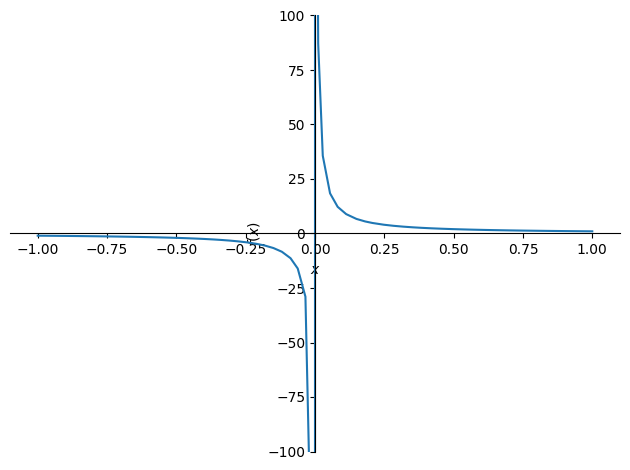

In [1]:
from sympy import init_printing, symbols
from sympy.plotting import plot
%matplotlib inline
init_printing(use_latex='mathjax')

x = symbols('x')
plot(1/x, (x, -1, 1), ylim=(-100, 100))

極限のとり方によって、発散の様子や収束する値が変わる<br>
-方向から0に近づける場合と+側から0に近づける場合で発散の様子が違う。+側から近づけた場合を右極限、-側から近づけたば場合を左極限という。

# SymPyを使った極限値の計算
limit関数を使う。<br>
$\lim_{x \to 1} (x +1)$を計算する

In [2]:
from sympy import limit
limit(x + 1, x, 1)

2

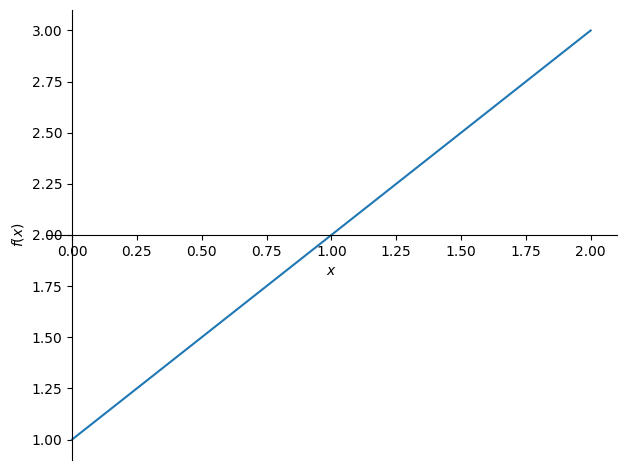

In [3]:
plot(x + 1, (x, 0,2))

In [4]:
from sympy import sin
# 極限公式1
limit(sin(x)/x, x, 0)

1

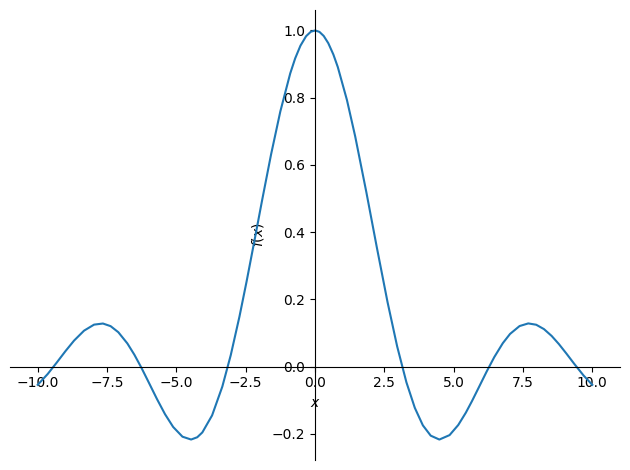

In [5]:
plot(sin(x)/x, (x, -10,10))

In [6]:
from sympy import E, exp
# 極限公式2
limit((exp(1)**x -1)/x, x, 0)

1

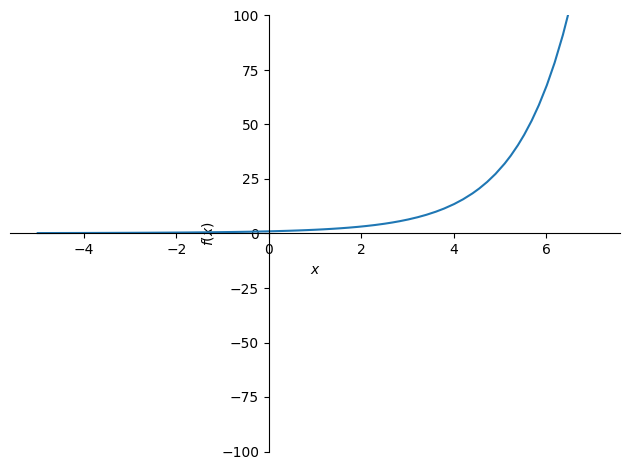

In [7]:
plot((exp(1)**x - 1)/ x, (x, -5, 7),ylim=(-100, 100))



In [8]:
# limit関数はデフォルトで右極限で計算する

limit(1/x, x, 0)

∞

In [9]:
# 左極限はdirで指定する
limit(1/x, x, 0, dir='-')

-∞

# 関数の極限

## 不定形の極限

$$ \lim_{x \to 2} \frac {x^2 - 5x +6} {x - 2} \tag{3.6}$$
について
$$ (分子)=2^2-5 \times 2 + 6 =0\tag{3.7}$$
$$ (分母)= 2 - 2 = 0 \tag{3.8}$$
となるため$\frac{0}{0}$の不定形となる。このままでは極限を計算できないため式変形を行う。

In [10]:
#関数のオブジェクトを作る
number = x**2 - 5*x + 6 # 分子
denom = x - 2 # 分母
f = number / denom
f

 2          
x  - 5⋅x + 6
────────────
   x - 2    

分子$x^2- 5x +6$は$x=2$で0となることから、$x-2$に因数を持つ。factorで因数分解を行う

In [11]:
from sympy import factor
factor(number)

(x - 3)⋅(x - 2)

In [12]:
# 分母と分子の共通因数を約分
factor(number)/ denom

x - 3

In [13]:
# simplifyをつかってもいい
from sympy import simplify
simplify(f)

x - 3

simplifyは数式を簡略化する関数。$\frac{x^2-5x+6}{x-2}$では分母と分子の共通因数$x-2$で約分が実行されている。<br>
$\frac{x^2-5x+6}{x-2}$は分子を因数分解して約分すると$$\frac{x^2-5x+6}{x-2} = x-3\tag{3.9}$$になり式（3.9）の右辺の形になると極限を求めることができる。<br>
約分計算をすることで、不定形の関数の極限値を求めることができるようになる。$x-3$に$x=2$を代入すると。$-1$となる。
$$\displaystyle \lim_{x \to 2} \frac{x^2-5x+6}{x-2} = -1$$

In [14]:
limit((x**2 - 5*x +6)/(x -2), x, 2)

-1

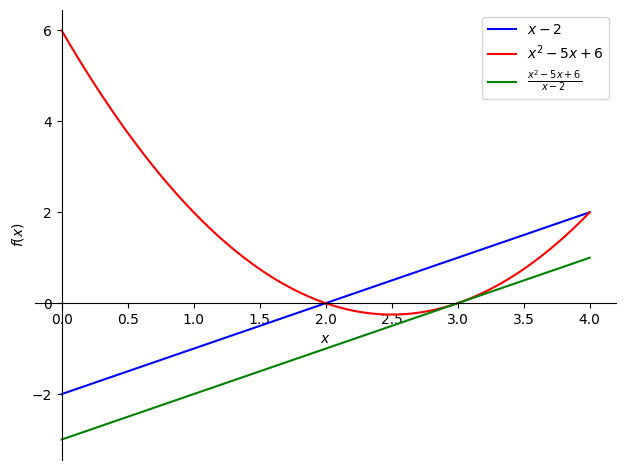

In [15]:
x_range = [0,4]
p = plot(denom, number, f, (x, x_range[0], x_range[1]), show=False, legend=True)

p[0].line_color = 'b'
p[1].line_color = 'r'
p[2].line_color = 'g'

p.show()

$\frac{x^2-5x+6}{x-2}$は期待通り一次関数である。

## $\frac{sin x}{x}$の極限
次の極限値を求める。
$$\displaystyle \lim_{x \to 0} \frac{sin x} {x}\tag{3.11}$$
$x=0$において
$$\sin x = 0\tag{3.12}$$
$$x = 0\tag{3.13}$$
となり。 $\frac{sin x}{x}$<br>
$\sin x$と$x$では約分ができないため、素直にlimit関数をつかう。

In [16]:
from sympy import sin, pi
limit(sin(x) / x ,x,0)

1

limit関数の結果から、
$$\displaystyle \lim_{x \to 0} \frac{sin x} {x} = 1\tag{3.14}$$
と求まる。計算方法がわからなくてもとりあえず計算を試みることができるのがコンピュータを使うメリットのひとつ。式（3.14）から、$x \simeq 0$において$\frac{sin x} {x} \simeq 1$つまり
$$\sin x \simeq x \tag{3.15}$$
となることがわかる。$\frac{sin x} {x}$の$\sin x$と$x$のプロットで確認する。

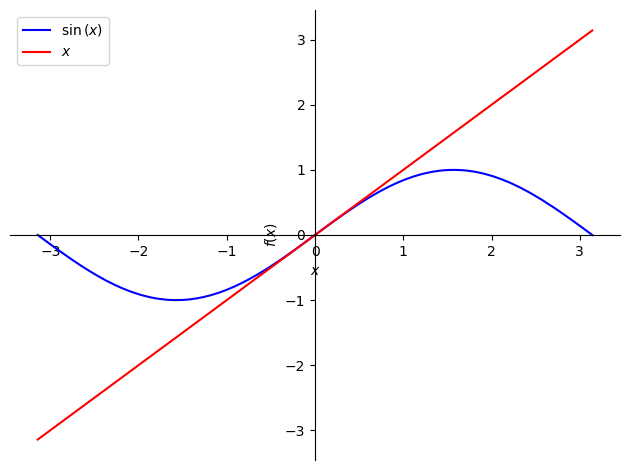

In [17]:
x_range = [-pi, pi]
p = plot(sin(x), x, (x, x_range[0], x_range[1]),
         show=False, legend=True)

p[0].line_color = 'b'
p[1].line_color = 'r'

p.show()

$-\pi \leqq x \leqq \pi$の範囲では$\sin x \neq x$となるが、$x \simeq 0$において$\sin x$と$x$は一致しそうである。

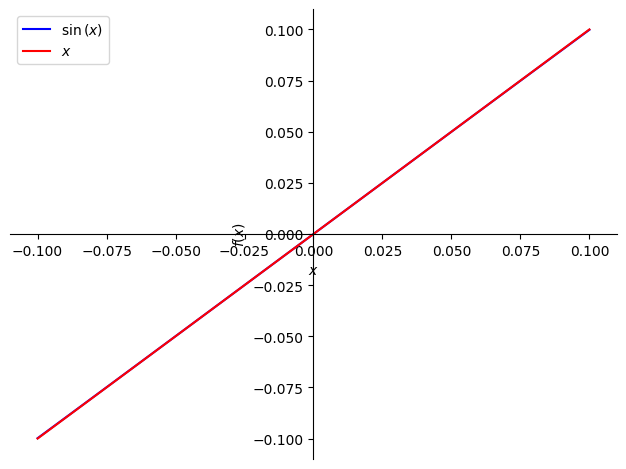

In [18]:
x_range = [-0.1, 0.1]

p = plot(sin(x), x, (x, x_range[0], x_range[1]),
         show=False, legend=True)

p[0].line_color = 'b'
p[1].line_color = 'r'

p.show()

プロットが重なることから$\sin x \simeq x (x \simeq 0)$であることが確認できる。プロットを確認することで求めたい極限値の収束・発散を判定したり極限値計算のイメージを持つことができる。<br>


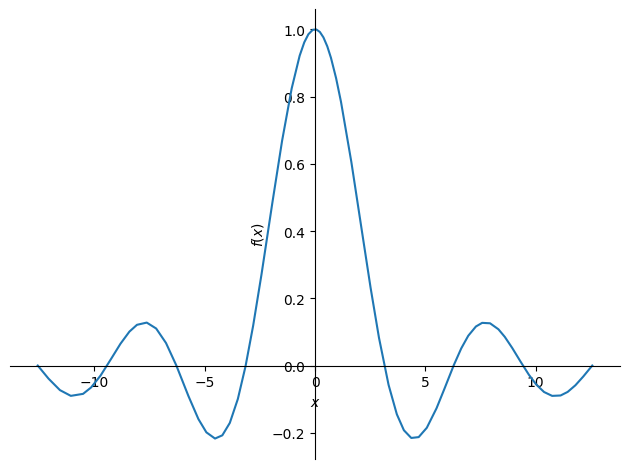

In [19]:
plot(sin(x)/ x, (x, -4*pi, 4*pi))

## 自然対数の底$e$

$e$はネイピア数とも言われる。ベルヌーイの定義によれば<br>
$$\displaystyle e = \lim_{n \to \infty} (1 + \frac {1}{n})^n \tag{3.16}$$
式（3.16）の$(1 + \frac{1}{n})$は$n \to \infty$のおいて$(1 + \frac{1}{n}) \to 1$となるが、$(1 + \frac{1}{n})$の指数が$n$であるため、直感的に極限値を求めることが難しそう。<br>
limit関数で求めてみる。


In [21]:
from sympy import oo

n = symbols('n', real=True, positive=True)
e_O = limit((1 + 1/n)**n, n, oo)
e_O

ℯ

In [22]:
# evalfで数式を評価
e_O.evalf(6)

2.71828

In [23]:
e_O.evalf(20)

2.7182818284590452354

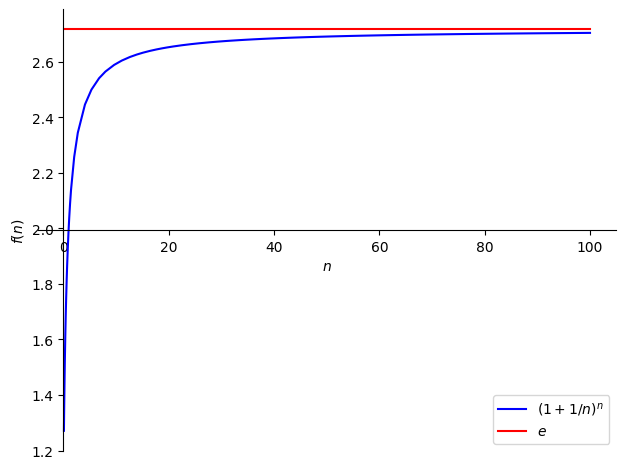

In [26]:
# 極限値がeに収束する様子をプロット
p = plot((1 + 1/n)**(n), e_O, (n, 0.1, 100),
         show=False, legend=True)

p[0].line_color = 'b'
p[1].line_color = 'r'
p.show()


## 円周率の計算
極限値の計算例として、級数で円周率を求める。
- 級数とは
  - 数列$\{a_{n}\}$を1つ目の項から$n = \infty$まで足した和

数列$\{a_{n}\}$の級数$s$を数式で表すと

$$\displaystyle  s = \sum_{n=1}^\infty a_n\tag{3.17}$$



In [27]:
from sympy import Sum

k, n = symbols('k n')
sum_pi = Sum(1/k**2, (k, 1, n))
sum_pi

  n     
 ____   
 ╲      
  ╲   1 
   ╲  ──
   ╱   2
  ╱   k 
 ╱      
 ‾‾‾‾   
k = 1   

In [28]:
s_val = limit(sum_pi.doit(), n, oo)
s_val

 2
π 
──
6 

In [29]:
from sympy import sqrt

sqrt(6 * s_val)

π

In [30]:
from sympy import lambdify

f = lambdify(n, sqrt(6*sum_pi))

In [31]:
f(10)

3.0493616359820694

In [36]:
f(100000)

3.141583104326456

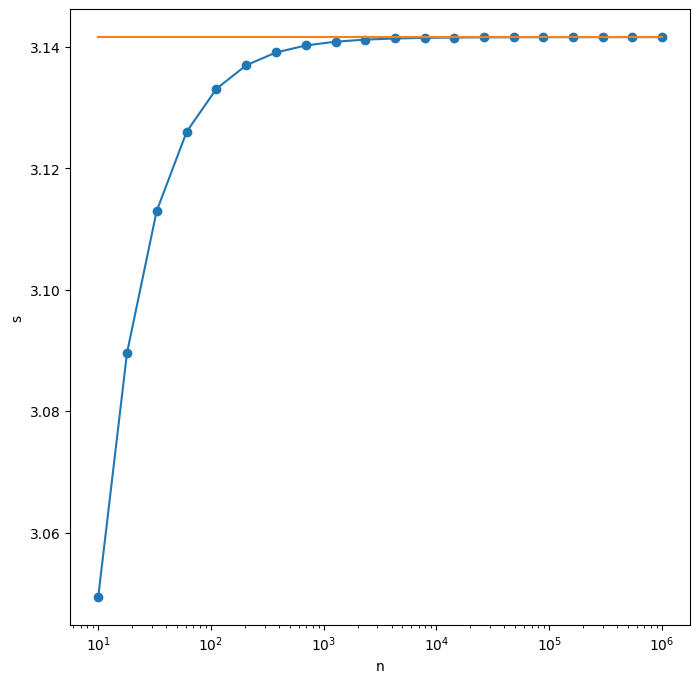

In [34]:
import numpy as np

import matplotlib.pyplot as plt

n_array = np.logspace(1, 6, 20, dtype='int')
sum_array = [f(n_array[i]) for i in range(len(n_array))]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.plot(n_array, sum_array, marker='o')
ax.plot(n_array, np.pi*np.ones(20))
ax.set_xscale('log')

ax.set_xlabel('n')
ax.set_ylabel('s')

plt.show()